### Exercise 1 Data based modeling and control

#### Imports

In [1]:
import scipy
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp


from models import arx



%matplotlib inline

#### Loading Matlab data 

In [2]:
mat_1 = scipy.io.loadmat("/home/matthias/WS_all/dbm/raw/ex1_handout/ex1_lsq_eqnerror_data2_step.mat")
mat_2 = scipy.io.loadmat("/home/matthias/WS_all/dbm/raw/ex1_handout/ex1_lsq_eqnerror_data1_step.mat")

for k in mat_1.keys():
    print(k)

for k in mat_2.keys():
    print(k)

__header__
__version__
__globals__
t2
u2
y2
__header__
__version__
__globals__
None
p
t
u
y
__function_workspace__


#### First look at data

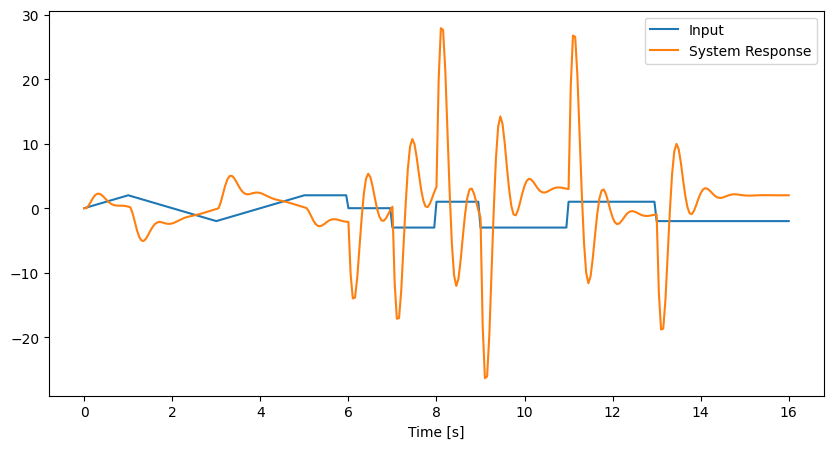

In [3]:
t2 = [e[0] for e in mat_1.get("t2").T]
u2 = [e[0] for e in mat_1.get("u2")]
y2 = jnp.array([e[0] for e in mat_1.get("y2")])

plt.figure(figsize=(10, 5))
plt.plot(t2,u2, label="Input")
plt.xlabel("Time [s]")
plt.plot(t2, y2,label="System Response")
plt.legend()
plt.show()




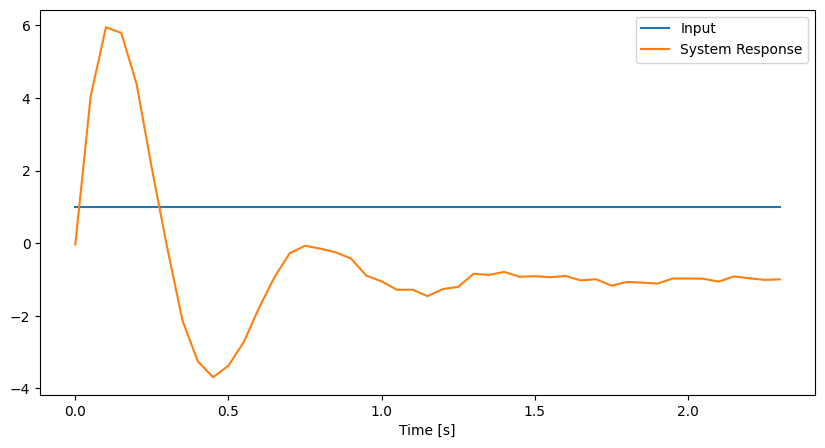

In [4]:
p = mat_2.get("p")
t = [e[0] for e in mat_2.get("t")]
u = [e[0] for e in mat_2.get("u")]
y = jnp.array([e[0] for e in mat_2.get("y")])

plt.figure(figsize=(10, 5))
plt.plot(t,u, label="Input")
plt.xlabel("Time [s]")
plt.plot(t, y,label="System Response")
plt.legend()
plt.show()

#### Declaring constants

In [5]:
# Constants
Ts = 0.05
NA = 4
NB = 4

#### Creation of Model

In [8]:
y_jax = jnp.array(y)
u_jax = jnp.array(u)
y2_jax = jnp.array(y2)
u2_jax = jnp.array(u2)
S_K = arx.data_matrix(y_jax, u_jax, NA, NB)
display(S_K[:6])

Array([[ 0.        ,  0.        ,  0.        , -0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.03970147,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 4.042273  , -0.03970147,  0.        ,  0.        ,  1.        ,
         1.        ,  1.        ,  0.        ,  0.        ],
       [ 5.948309  ,  4.042273  , -0.03970147,  0.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0.        ],
       [ 5.7912607 ,  5.948309  ,  4.042273  , -0.03970147,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 4.3845825 ,  5.7912607 ,  5.948309  ,  4.042273  ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ]],      dtype=float32)

In [7]:
p_hat:jax.Array = jnp.linalg.pinv(S_K) @ jnp.array(y)

In [8]:
p_opt, loss, na,nb = arx.optimize(y_jax, u_jax, (1,10),(1,10))



Testing 81 combinations.
1.0100372
Progress: 1.23 %
Current iteration: 1 / 81
Iteration took 0.29 seconds, average 0.15 seconds
0.8542621
0.7126865
0.64549243
0.6274881
0.769817
0.50358766
0.45921558
0.38278788
1.0935661
0.1040864
0.22448632
0.3171515
0.3143014
4.876158
0.1993502
0.60274523
0.30568674
1.3770541
335748350.0
0.06503345
0.09500014
0.31919366
0.058179762
0.050741527
0.27621308
0.04234937
1210751.8
0.112171076
0.055190682
0.84122115
0.046068545
0.053418767
0.057045758
0.0656174
0.055099733
120009.664
1815.603
0.3394447
0.06179408
0.04508769
0.05076339
0.048065707
0.043251425
0.07799098
207.0218
47019.957
0.054929104
0.05423799
0.046422448
0.045823228
2.2192318
2.0401311e+30
0.16469406
1207.0352
14419.331
0.045395926
0.056553606
0.043867968
0.06656185
0.06583568
0.06378202
0.052794065
14665.901
2280806.8
0.09212682
0.045487635
0.042720065
0.047573417
0.04387529
0.044355452
188621.0
2404.8694
0.738048
0.07411648
0.045553487
0.044520553
0.042603396
0.044806536
0.16635665
0.047

In [15]:
display(na, nb)

u = jnp.ones((y_jax.shape[0],))
y_test = arx.simulate(jnp.array([0]),u,NA,NB,p_hat)
y_opt = arx.simulate(jnp.array([0]),u,na,nb,p_opt)

y2_out = arx.simulate(jnp.array([0]),u2_jax,na,nb,p_opt)

3

9

#### Plot Results of step response

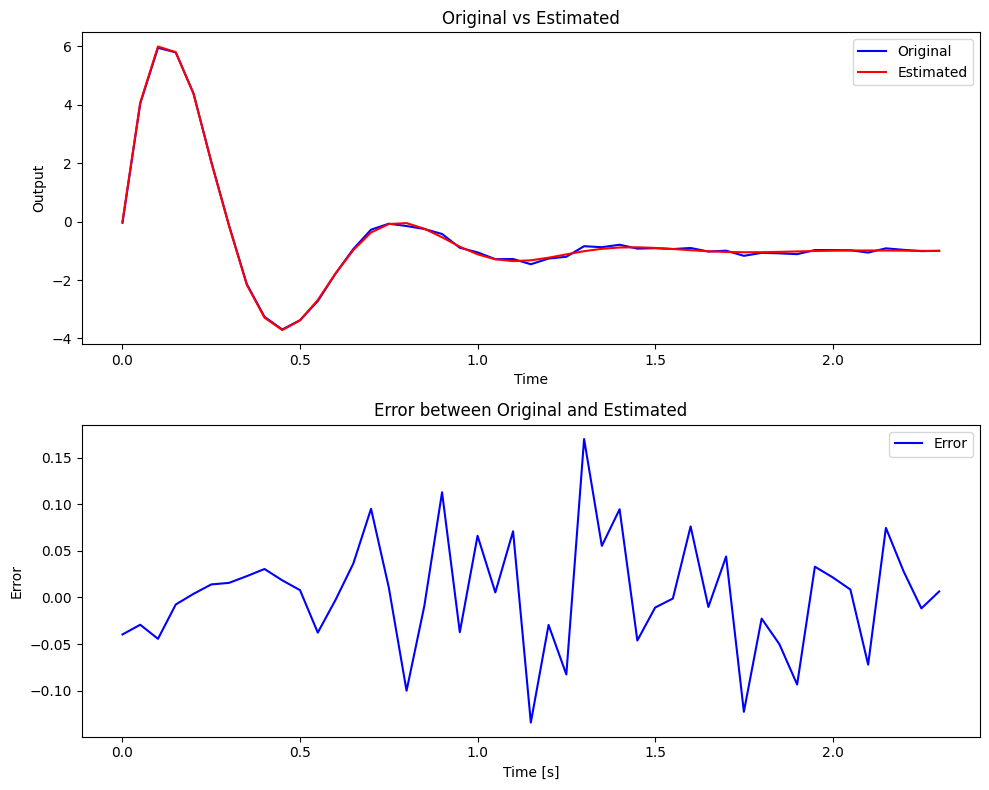

In [16]:
fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(t, y, 'b-', label='Original')
ax[0].plot(t, y_opt, 'r-', label='Estimated')
ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Output')
ax[0].set_title('Original vs Estimated')

ax[1].plot(t, (y - y_opt), 'b-', label='Error')
ax[1].legend()
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Error')
ax[1].set_title('Error between Original and Estimated')
plt.tight_layout()
plt.show()

#### Plot results of validation set

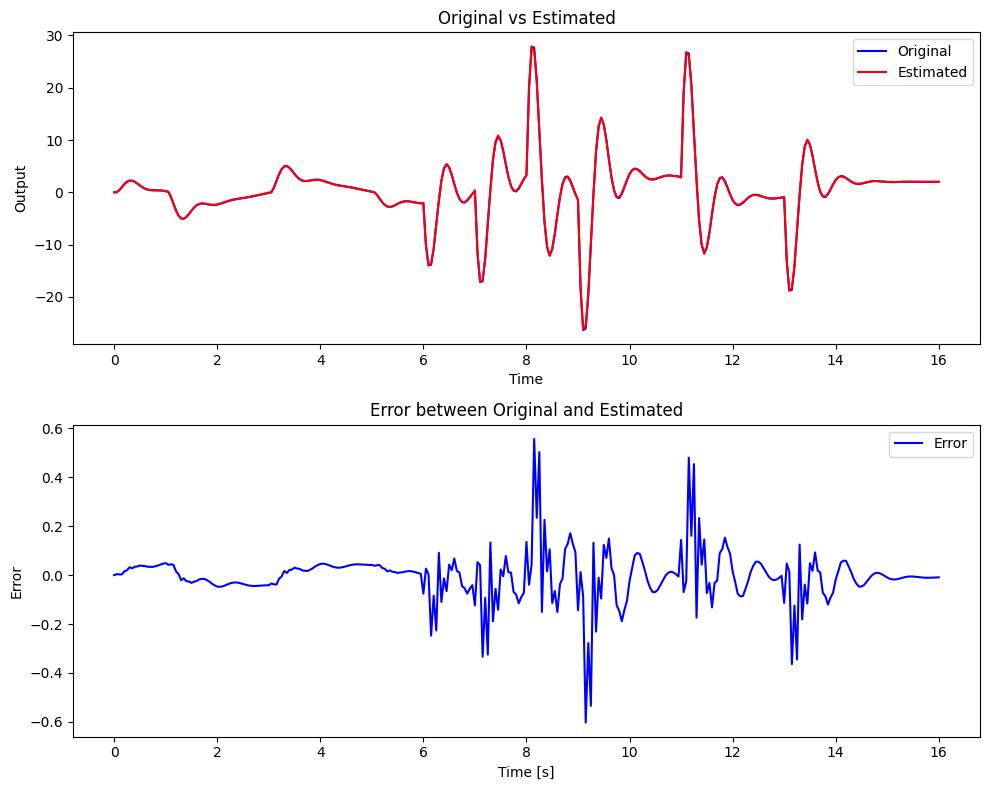

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(t2, y2, 'b-', label='Original')
axs[0].plot(t2, y2_out, 'r-', label='Estimated')
axs[0].legend()
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Output')
axs[0].set_title('Original vs Estimated')

axs[1].plot(t2, (y2 - y2_out) , 'b-', label='Error')
axs[1].legend()
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Error')
axs[1].set_title('Error between Original and Estimated')
plt.tight_layout()
plt.show()